We run our simulations with a population with exponential birth rate and constant per capita dath rate.

In [1]:
from epistrains import Population, make_br, Strain, Solver

birth_rate_function = make_br(a=10.0, k=0.001)


We simulate over a popoulation with initial size 150,000 (approximately the size of Oxford) with a constant per capita death rate of 0.000006.

In [2]:

population = Population(death=0.000006, size=150000, birth_function=birth_rate_function)

Now we generate a model with 2 strains. Comparing the 2 strains I1 and I2, I1 is a less infectious (R0 = 3.14 rather than 4.22) and less deadly strain (Case fatality rate 'CFR' of 0.00007 rather than 0.001) with  a slightly shorter recovery time (7 days rather than 8). 
We introduce 150 individuals with the less infectious variant and 10 with the more infectious variant, for an approximate 5% of Freshers in Oxford infected at the start of the simulation.


In [3]:

I1 = Strain(CFR=0.00007, recovery_time=7, R0=3.14, infected=150)
I2 = Strain(CFR=0.001, recovery_time=8, R0=4.22, infected=10)


We then instantiate the Solver class, providing it with the population structure and the two strains to be modelled, as well as the total time of 70 days over which to run the simulation.

We then solve the set of equations for the 4 compartments

In [4]:
model = Solver(pop=population, strains=[I1, I2], time=70)

model.solve()

We now plot these results.

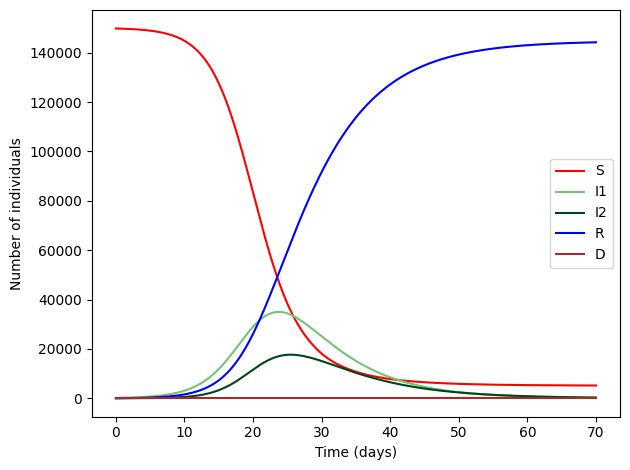

In [5]:
model.plot_compartments()

We include a new test simulating over a popoulation with the same initial size 150,000 and per capita death rate of 0.000006. However, we now include a waning immunity of 0.01 meaning that on average immunity wanes in a period of 100 days.

In [6]:

population = Population(death=0.000006, size=150000, birth_function=birth_rate_function, waning = 0.01)


We then proceed to instantiate, solve and plot the model as before.

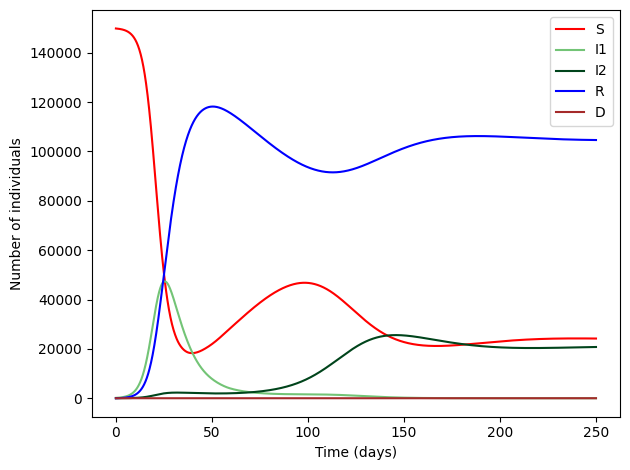

In [7]:
I1 = Strain(CFR=0.00007, recovery_time=7, R0=3.14, infected=150)
I2 = Strain(CFR=0.001, recovery_time=20, R0=6.28, infected=10)

model = Solver(pop=population, strains=[I1, I2], time=250)

model.solve()

model.plot_compartments()

We now seek to provide more meaningful inputs for a given pandemic. We choose to simulate this for a population the size of the UK (70 million) with strains similar to the current variants of COVID-19 in the UK, I1 having parameter values that approximately correspond to BA.5/BA.4 and I2 has parameters approximately corresponding to BQ.1/BQ.1.1. 
We also include a waning immunity similar to that expected of COVID-19 (70 days). Also, we introduce a percentage of the population (in this case 30%) to be immune at the initial conditions for our system.

In [8]:
population = Population(death=0.000006, size=70000000, birth_function=birth_rate_function, waning = 0.014, immunity = 30)

I1 = Strain(CFR=0.000167, recovery_time=7, R0=8, infected=1700000)
I2 = Strain(CFR=0.000167, recovery_time=7, R0=10, infected=400000)


We again solve the system and plot as before plotting over a year (365 days).

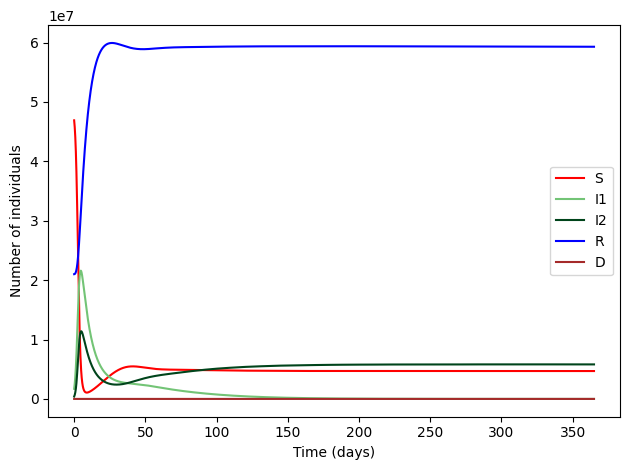

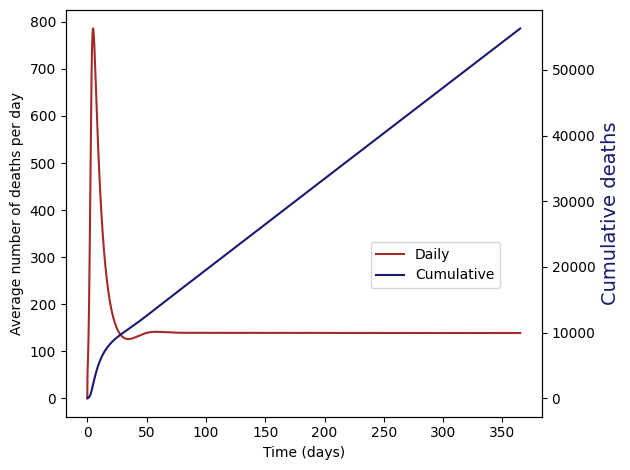

In [9]:
model = Solver(pop=population, strains=[I1, I2], time=365)

model.solve()

model.plot_compartments()

model.plot_death()

We return to a population of size 150000. We introduce a less infectious variant (R0=3) with 1000 people at initial time then after 5 days a new variants is added with 10 people and is much more infectious (R0=6).

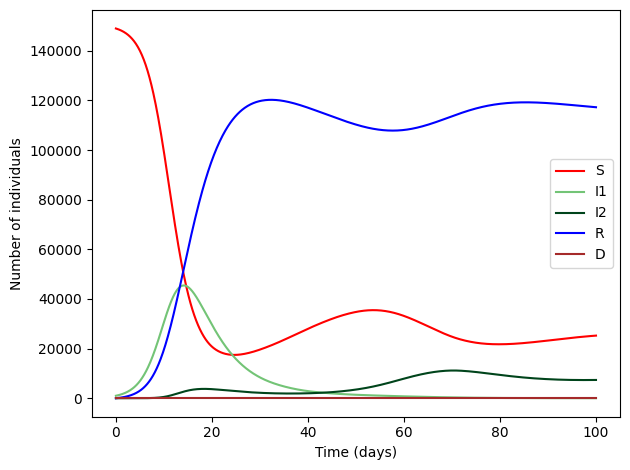

In [10]:
population = Population(death=0.000006, size=150000, birth_function=birth_rate_function, waning = 0.014)

I1 = Strain(CFR=0.000167, recovery_time=5, R0=3, infected=1000)
I2 = Strain(CFR=0.000167, recovery_time=5, R0=6, infected=10, delay = 5.0)

model = Solver(pop=population, strains=[I1, I2], time=100)

model.solve()

model.plot_compartments()